In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt;
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats



In [2]:
data=pd.read_csv("/content/vgsales.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
data.dropna(subset=['Publisher'],inplace=True);
data['Year'].fillna(method='ffill',inplace=True);

**Action Genre has the Highest Global Sales and Platform Genre has Highest Average Global Sales**

In [6]:
totalsales=round(data.groupby(['Genre']).sum(),0)
totalsales.reset_index(inplace=True)
avgsales=round(data.groupby(['Genre']).mean(),2)
avgsales.reset_index(inplace=True)

<ipython-input-6-e1f49ac9e186>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  totalsales=round(data.groupby(['Genre']).sum(),0)
<ipython-input-6-e1f49ac9e186>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avgsales=round(data.groupby(['Genre']).mean(),2)


In [7]:
sales=[]
for i in range(0,len(totalsales)):
    one ={
	    'Genre' : totalsales.iloc[i]['Genre'],
	    'Total_Sales' : totalsales.iloc[i]['Global_Sales'],
	    'Avg_Sales' : avgsales.iloc[i]['Global_Sales']
	    }
    sales.append(one)
sales=pd.DataFrame(sales)
sales.sort_values('Total_Sales',inplace=True)

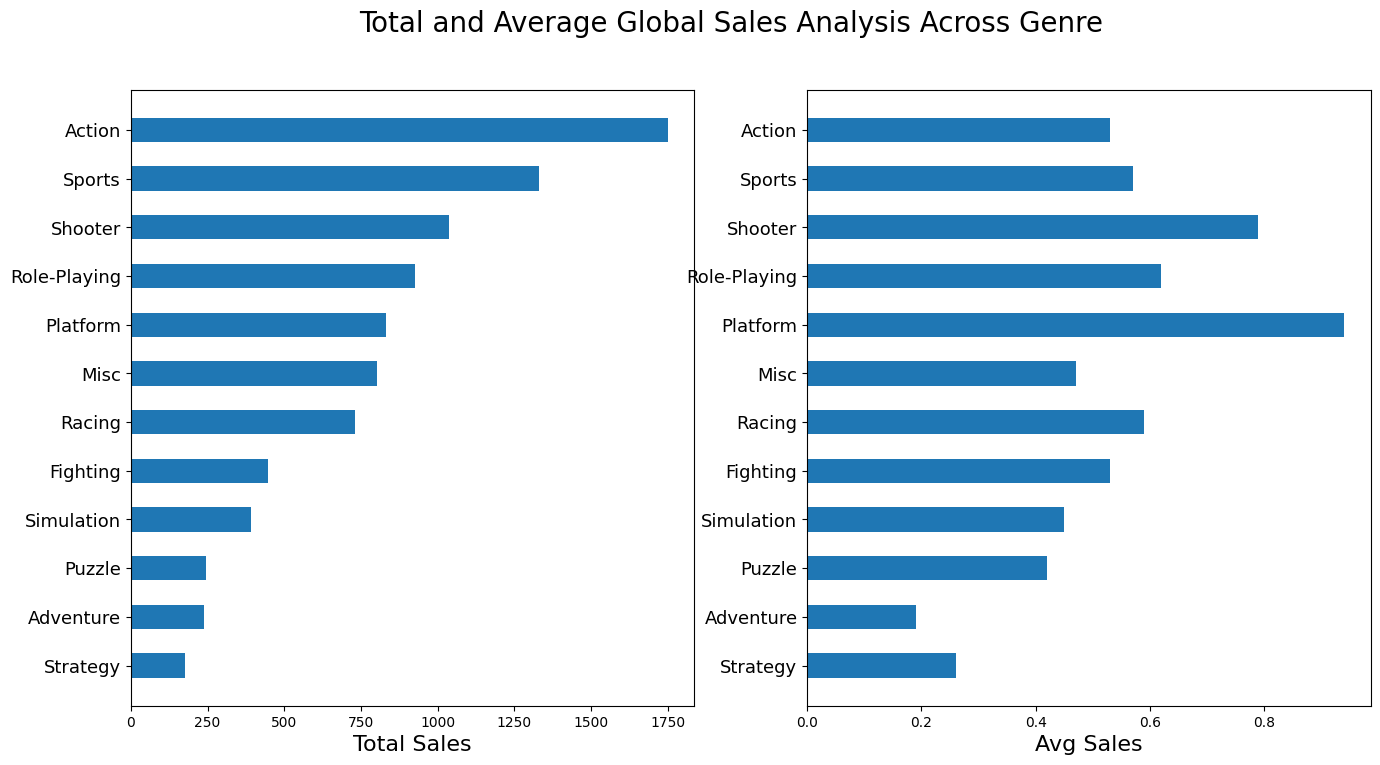

In [8]:
plt.figure(figsize=(16,8))
plt.suptitle('Total and Average Global Sales Analysis Across Genre',fontsize=20)
plt.subplot(121)
plt.barh(sales['Genre'],sales['Total_Sales'],height=0.5)
plt.xlabel('Total Sales',fontsize=16)
plt.yticks(fontsize=13)
plt.subplot(122)
plt.barh(sales['Genre'],sales['Avg_Sales'],height=0.5)
plt.xlabel('Avg Sales',fontsize=16)
plt.yticks(fontsize=13)
plt.show()


**Global Sales Percentage Distributed between Genre**

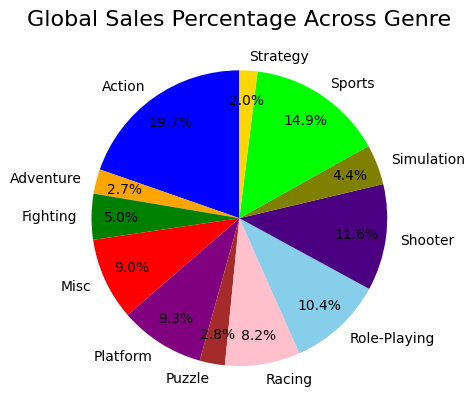

In [9]:
color=['blue','orange','green','red','purple','brown','pink','skyblue','indigo','olive','lime','gold']
#plt.figure(figsize=(5,5))
plt.pie(totalsales.Global_Sales,labels=totalsales.Genre,pctdistance=0.8,labeldistance=1.1,autopct='%1.1f%%',startangle=90,colors=color,)
plt.title('Global Sales Percentage Across Genre',fontsize=16)
plt.show()

**Number of Games In Top 20 Platform**

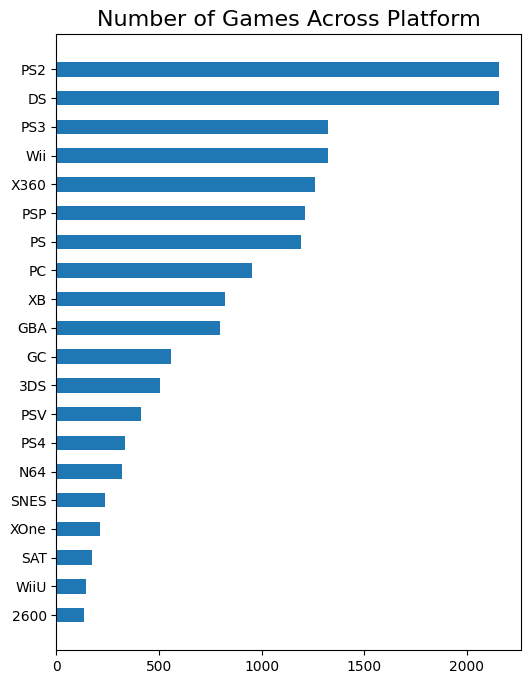

In [10]:
platform=pd.DataFrame(data.Platform.value_counts())
platform.reset_index(inplace=True)
platform.rename(columns={'Platform': 'Number of Games', 'index': 'Platform'},inplace=True)
platform.drop(platform.index[20:],inplace=True)
platform.sort_values('Number of Games',inplace=True)
plt.figure(figsize=(6,8))
plt.barh(platform.Platform,platform['Number of Games'],height=0.5)
plt.title('Number of Games Across Platform',fontsize=16)
plt.show()

**Sales Percentage Distribution Across Region**

In [11]:
Genre=[]
North_America=[]
Europe=[]
Japan=[]
Other=[]
for i in range(0,len(totalsales)):
    Genre.append(totalsales.iloc[i].Genre)
    net=100/totalsales.iloc[i].Global_Sales
    North_America.append(round(totalsales.iloc[i].NA_Sales*net,4))
    Europe.append(round(totalsales.iloc[i].EU_Sales*net,4))
    Japan.append(round(totalsales.iloc[i].JP_Sales*net,4))
    Other.append(round(totalsales.iloc[i].Other_Sales*net,4))

Genre=np.array(Genre)
North_America=np.array(North_America)
Europe=np.array(Europe)
Japan=np.array(Japan)
Other=np.array(Other)


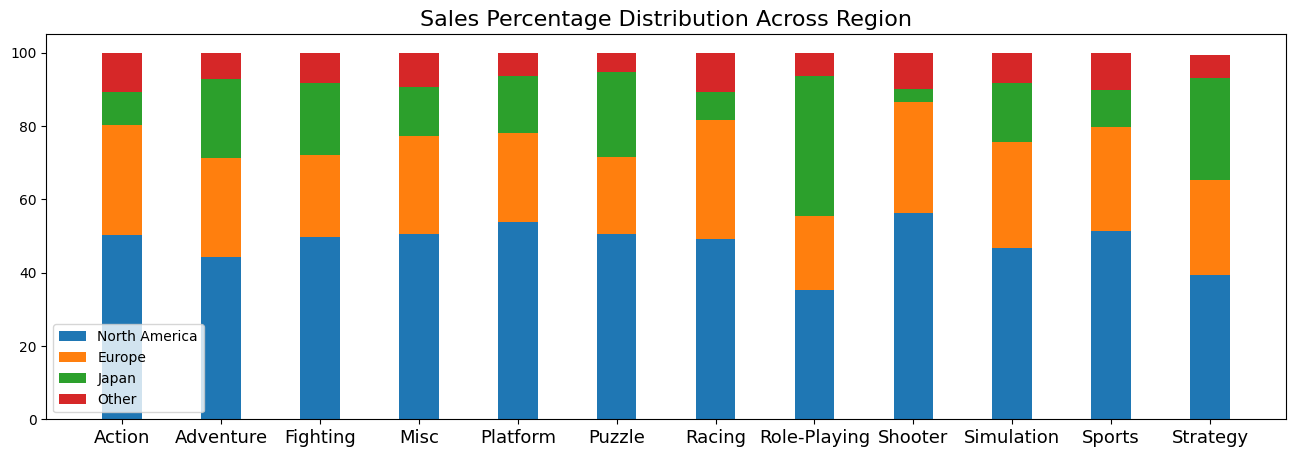

In [12]:
ind=np.arange(12)
width=0.4
plt.figure(figsize=(16,5))
plt.bar(ind,North_America,width)
plt.bar(ind,Europe,width,bottom=North_America)
plt.bar(ind,Japan,width,bottom=North_America+Europe)
plt.bar(ind,Other,width,bottom=North_America+Europe+Japan)
plt.xticks(ind,Genre,fontsize=13)
plt.legend(['North America','Europe','Japan','Other'])
plt.title('Sales Percentage Distribution Across Region',fontsize=16)
plt.show()

**Top 5 Games for Each Genre**

<ipython-input-14-6d0dc452b7f0>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for genre,games in df:
<ipython-input-14-6d0dc452b7f0>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  games=round(games.groupby(['Name']).sum(),2)
<ipython-input-14-6d0dc452b7f0>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  games=round(games.groupby(['Name']).sum(),2)
<ipython-input-14-6d0dc452b7f0>:5: FutureWarning: The default value of numeric_only i

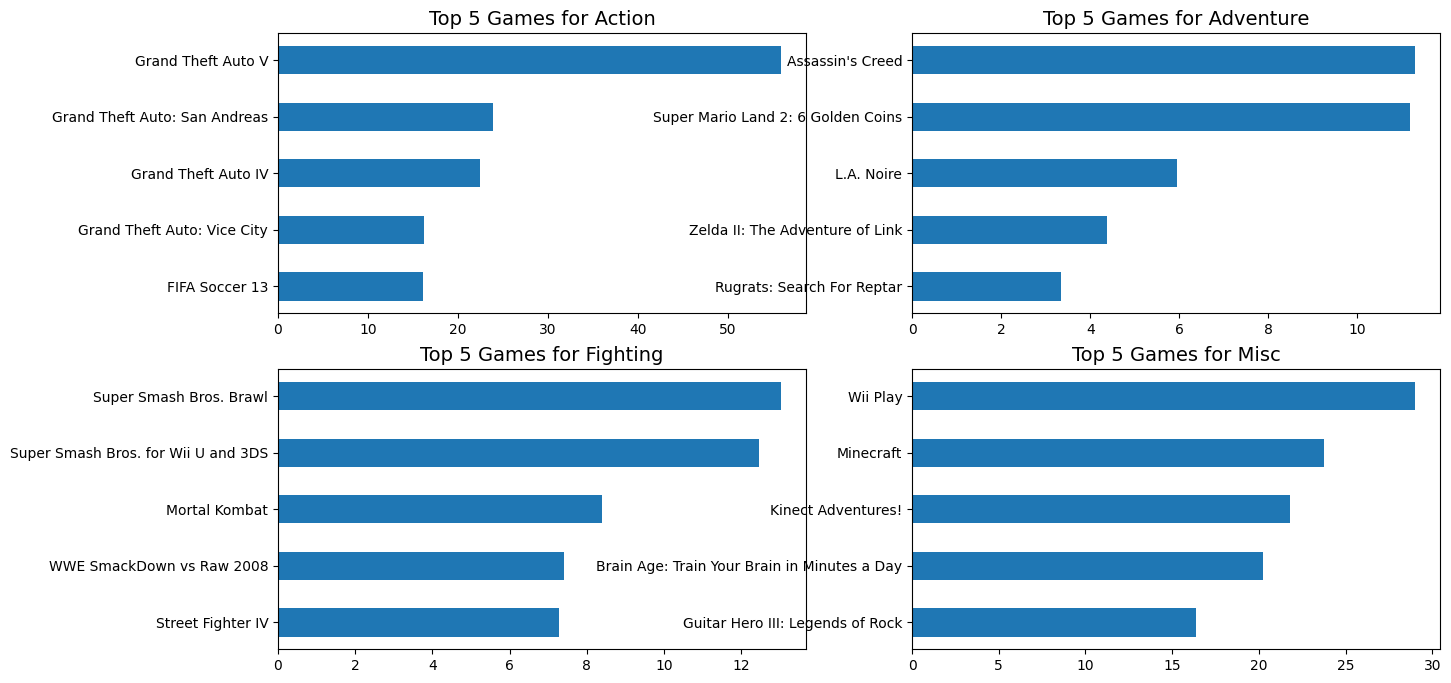

<ipython-input-14-6d0dc452b7f0>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  games=round(games.groupby(['Name']).sum(),2)
<ipython-input-14-6d0dc452b7f0>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  games=round(games.groupby(['Name']).sum(),2)
<ipython-input-14-6d0dc452b7f0>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  games=round(games.groupby(['Name']).sum(),2)
<ipython-input-14-6d0dc452b7f0>:5: FutureWarni

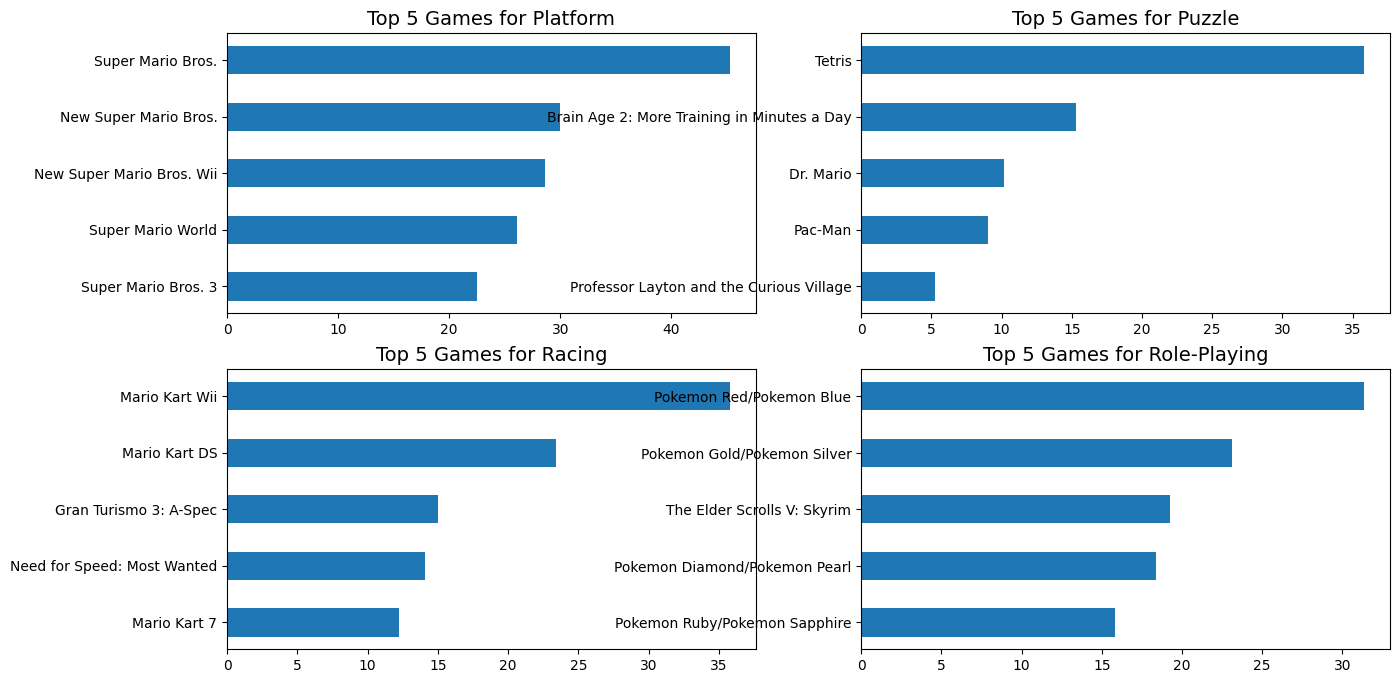

<ipython-input-14-6d0dc452b7f0>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  games=round(games.groupby(['Name']).sum(),2)
<ipython-input-14-6d0dc452b7f0>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  games=round(games.groupby(['Name']).sum(),2)
<ipython-input-14-6d0dc452b7f0>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  games=round(games.groupby(['Name']).sum(),2)
<ipython-input-14-6d0dc452b7f0>:5: FutureWarni

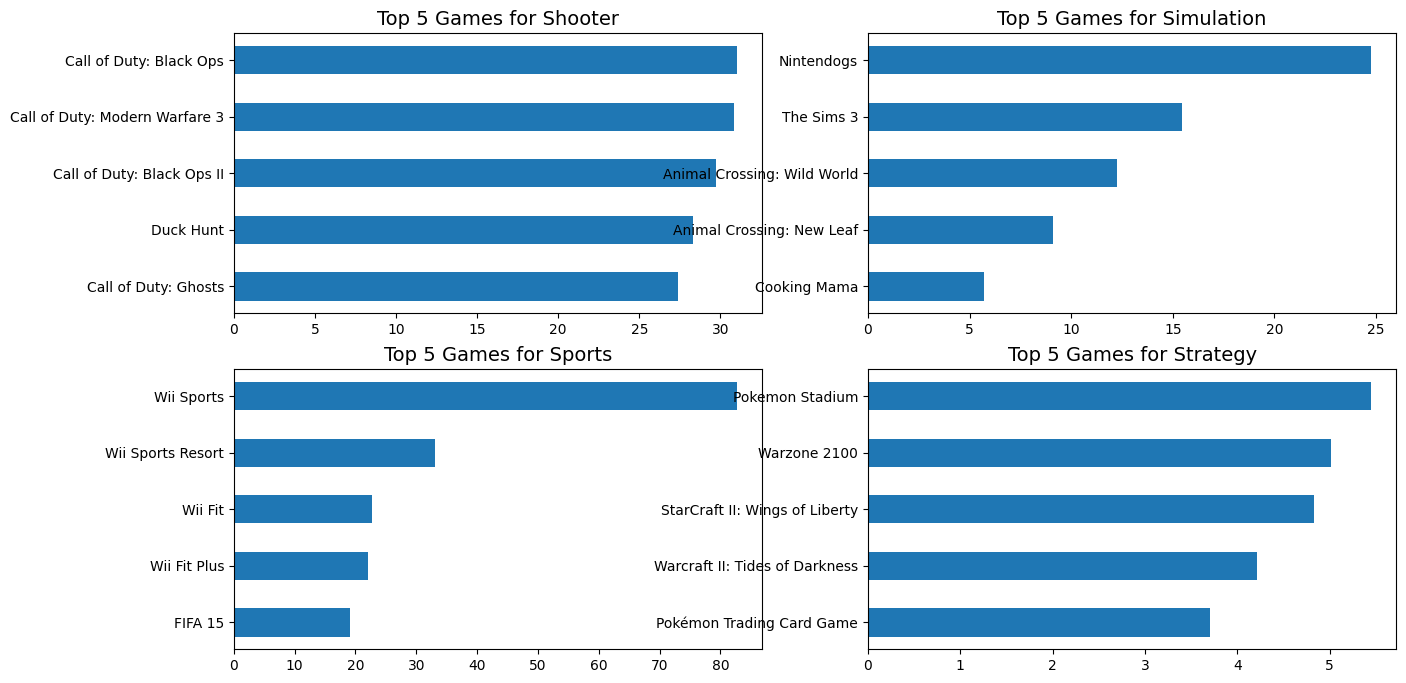

<Figure size 1500x800 with 0 Axes>

In [14]:
i=0
df=data.groupby(['Genre'])
plt.figure(figsize=(15,8))
for genre,games in df:
    games=round(games.groupby(['Name']).sum(),2)
    games.reset_index(inplace=True)
    games.sort_values(['Global_Sales'],inplace=True)
    games=games.iloc[len(games)-5:]
    i=i+1
    plt.subplot(2,2,i)
    plt.barh(games.Name,games.Global_Sales,height=0.5)
    plt.title("Top 5 Games for " + genre,fontsize=14)
    if i%4==0:
        i=0
        plt.show()
        plt.figure(figsize=(15,8))

**Global Sales Distribution Across Genre in Top 15 Platform**

In [17]:
platform=pd.DataFrame(data.groupby(['Platform']).sum())
platform.sort_values(['Global_Sales'],ascending=False,inplace=True)
platform.reset_index(inplace=True)
top15=[]
for i in range(0,15):
    top15.append(platform.iloc[i]['Platform'])
full=[]
for genre,table in df:
    table=round(table.groupby(['Platform']).sum(),0)
    table.reset_index(inplace=True)
    temp=[]
    for each in top15:
	    x=table[['Global_Sales']][table.Platform==each]
	    if len(x)==0:
		    temp.append(0)
	    else :
		    temp.append(x.iat[0,0])
    full.append(np.array(temp))

<ipython-input-17-4441615588ea>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  platform=pd.DataFrame(data.groupby(['Platform']).sum())
<ipython-input-17-4441615588ea>:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for genre,table in df:
<ipython-input-17-4441615588ea>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  table=round(table.groupby(['Platform']).sum(),0)
<ipython-input-17-4441615588ea>:9: FutureWarning: The default value of

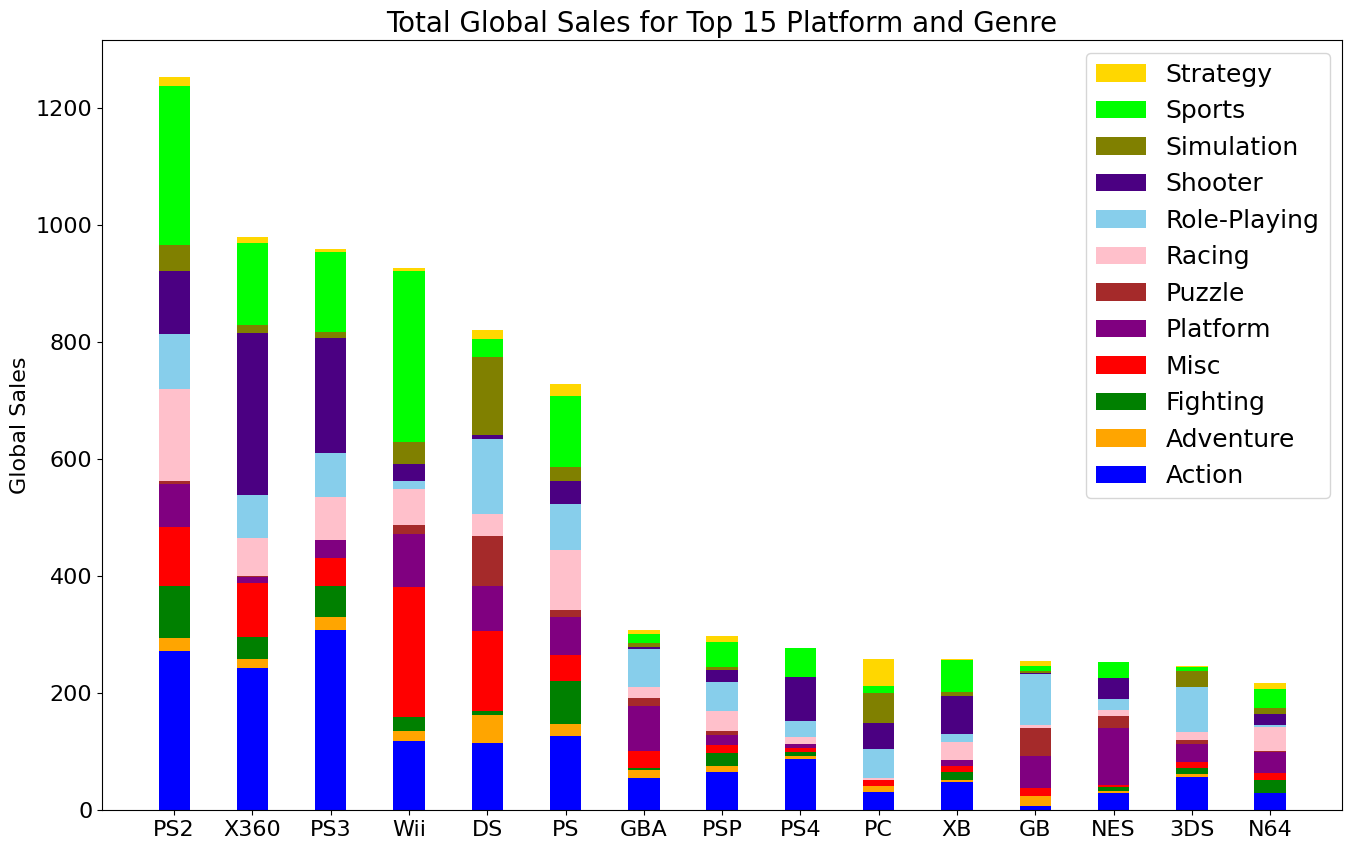

In [18]:
prev=np.zeros(15)
ind=np.arange(0,15)
px=[]
plt.figure(figsize=(16,10))
for i in range(0,len(Genre)):
    px.append(plt.bar(ind,full[i],width,bottom=prev,color=color[i]))
    prev=prev+full[i]
plt.xticks(ind,top15,fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Global Sales',fontsize=16)
plt.title('Total Global Sales for Top 15 Platform and Genre',fontsize=20)
plt.legend(reversed(px),reversed(Genre),fontsize=18);
plt.show()

In [19]:
data['Genre'].value_counts()

Action          3309
Sports          2343
Misc            1712
Role-Playing    1486
Shooter         1308
Adventure       1282
Racing          1248
Platform         884
Simulation       863
Fighting         846
Strategy         678
Puzzle           581
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

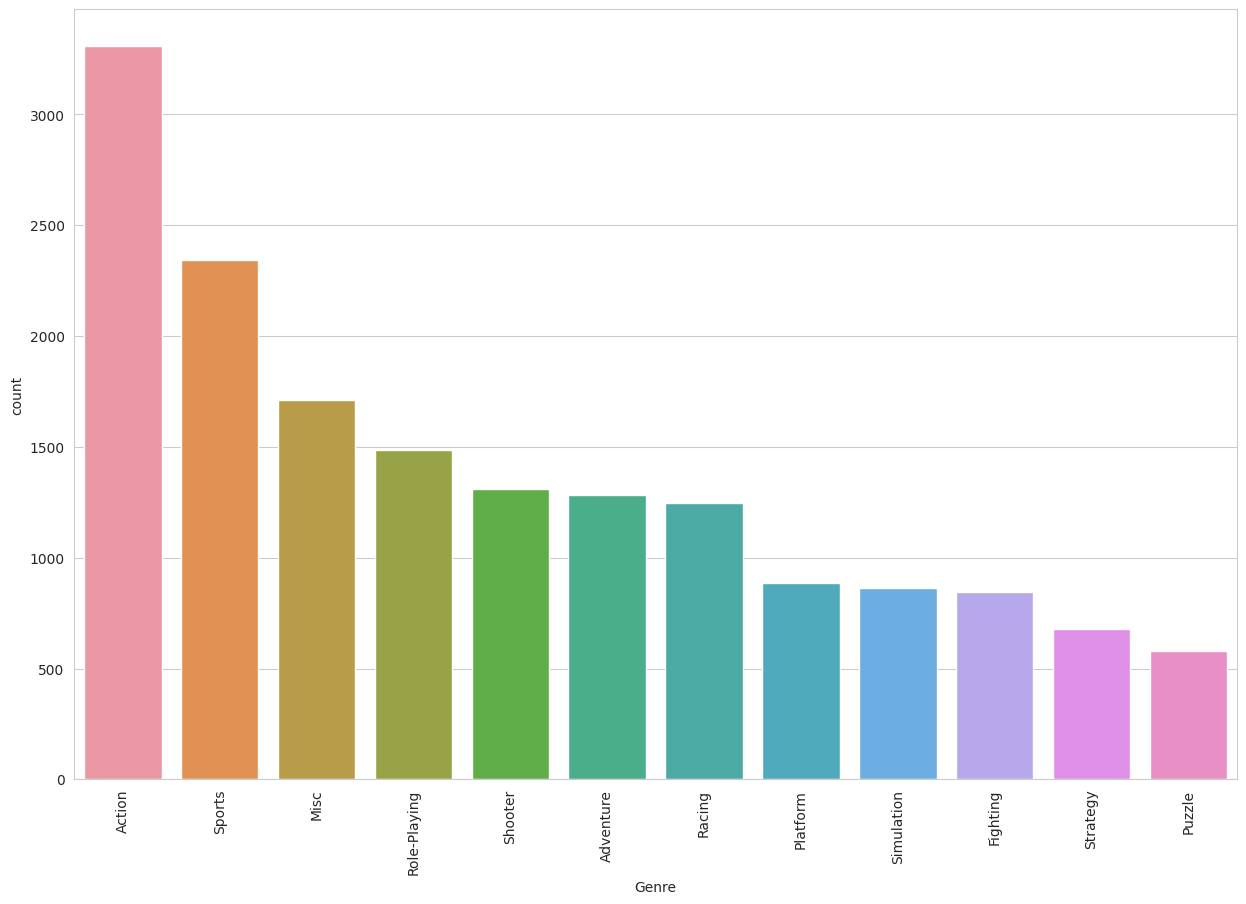

In [22]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)

** Which year had the most game release?**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '2008.0'),
  Text(1, 0, '2009.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2001.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2000.0'),
  Text(17, 0, '2016.0'),
  Text(18, 0, '1999.0'),
  Text(19, 0, '1997.0'),
  Text(20, 0, '1996.0'),
  Text(21, 0, '1995.0'),
  Text(22, 0, '1994.0'),
  Text(23, 0, '1993.0'),
  Text(24, 0, '1981.0'),
  Text(25, 0, '1992.0'),
  Text(26, 0, '1991.0'),
  Text(27, 0, '1982.0'),
  Text(28, 0, '1986.0'),
  Text(29, 0, '1989.0'),
  Text(30, 0, '1983.0'),
  Text(31, 0, '1987.0'),
  Text(32, 0, '1990.0'),
  T

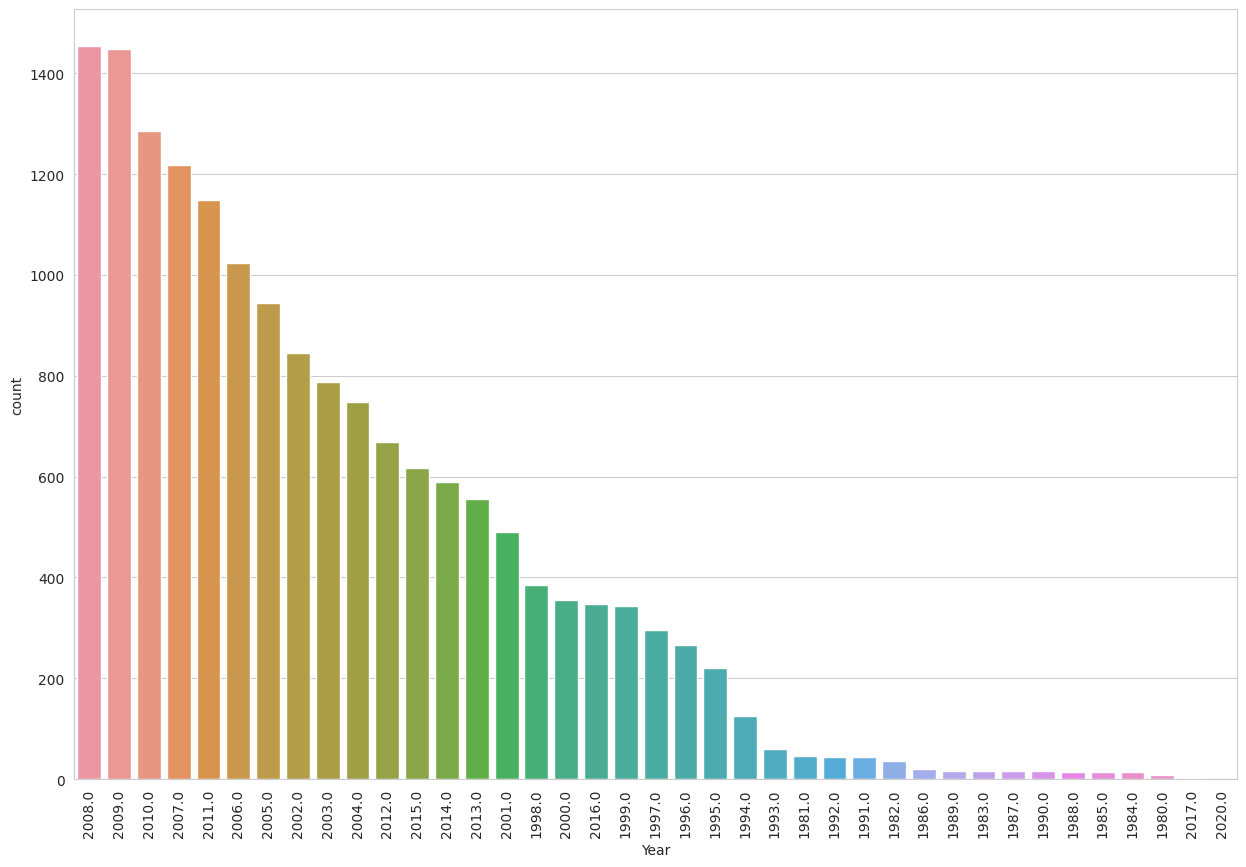

In [23]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

** Top 5 years games release by genre**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2008.0'),
  Text(1, 0, '2009.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0')])

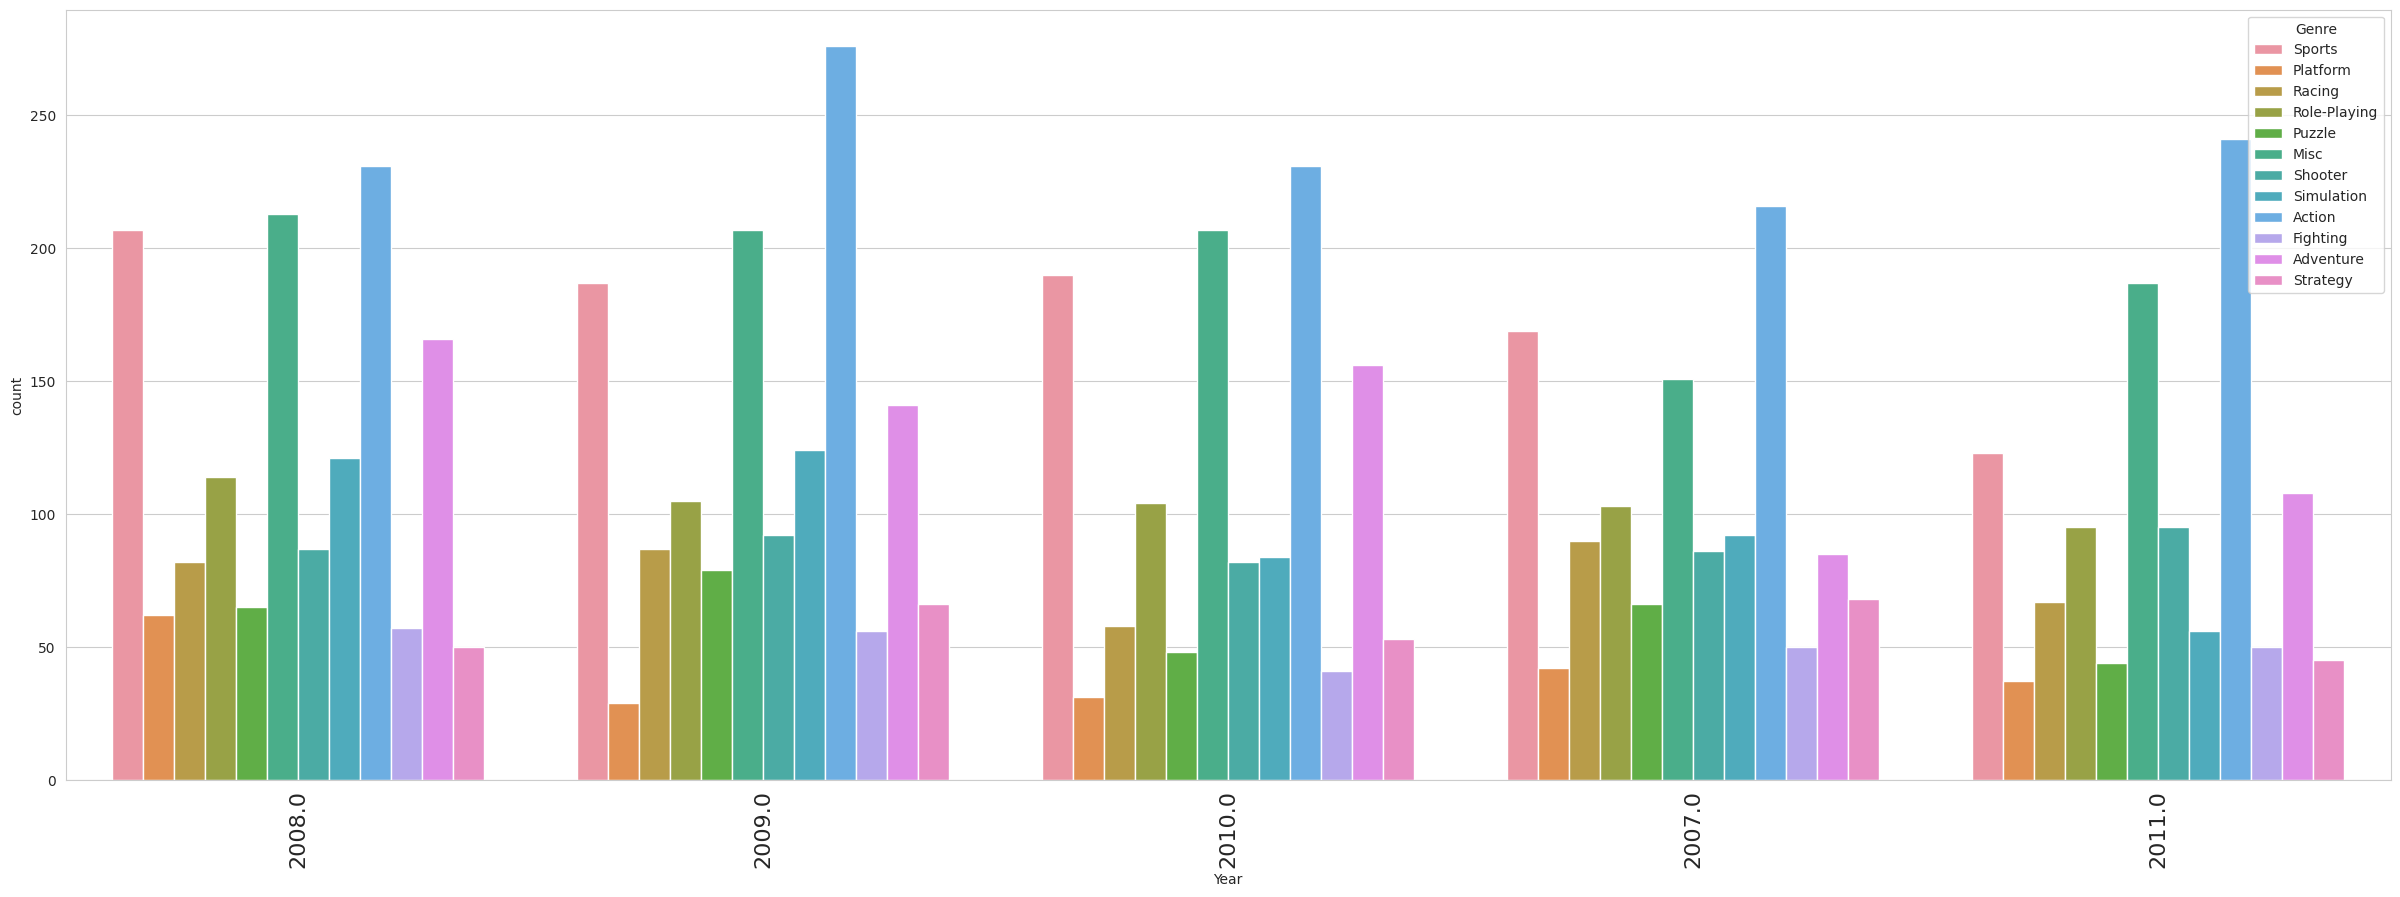

In [24]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=data, hue='Genre', order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

**Which year had the highest sales worldwide?**

In [25]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
# data_year.sort_values(by=['Global_Sales'], ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  T

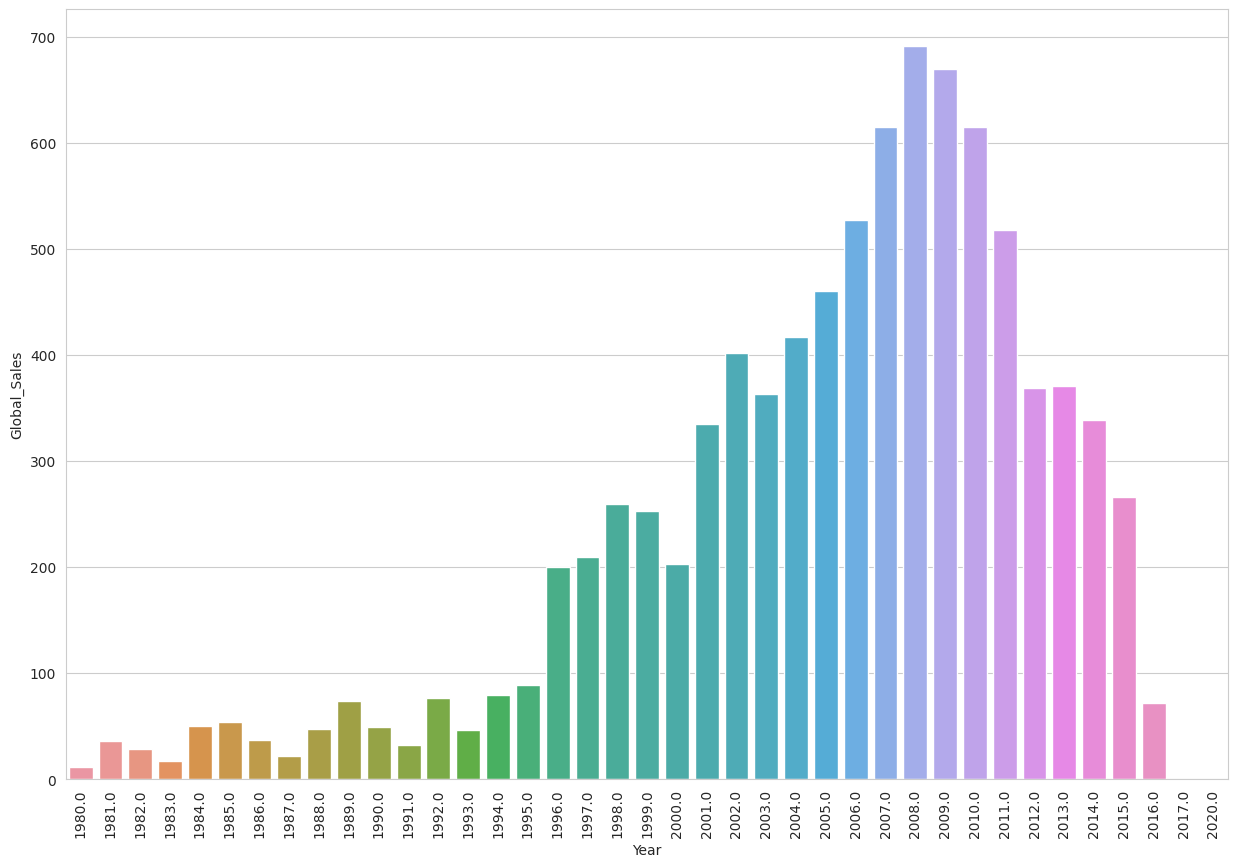

In [26]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)

** Which genre game have the highest sale price globally?**

In [27]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
# data_genre

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

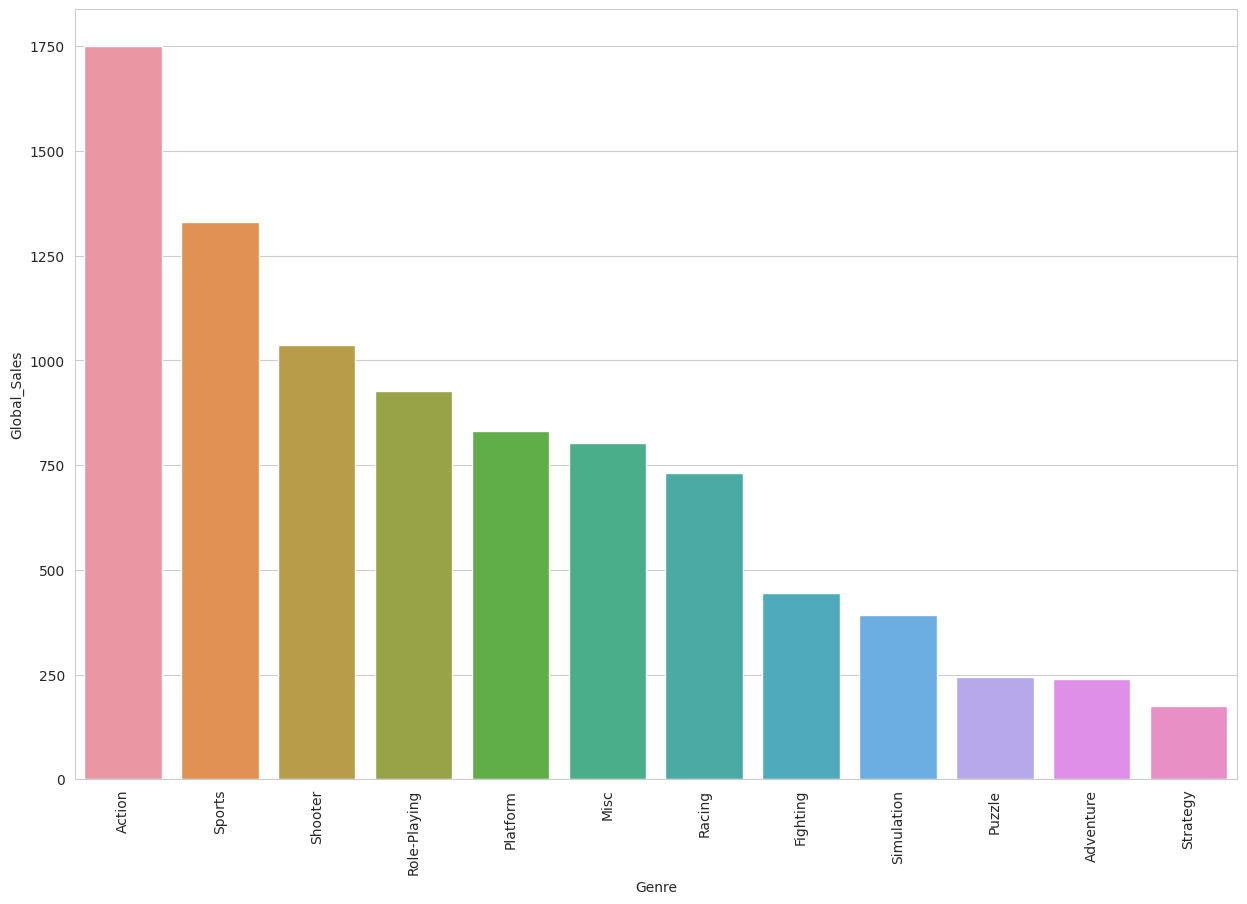

In [28]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)

**Sales compearison by genre**

In [29]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map

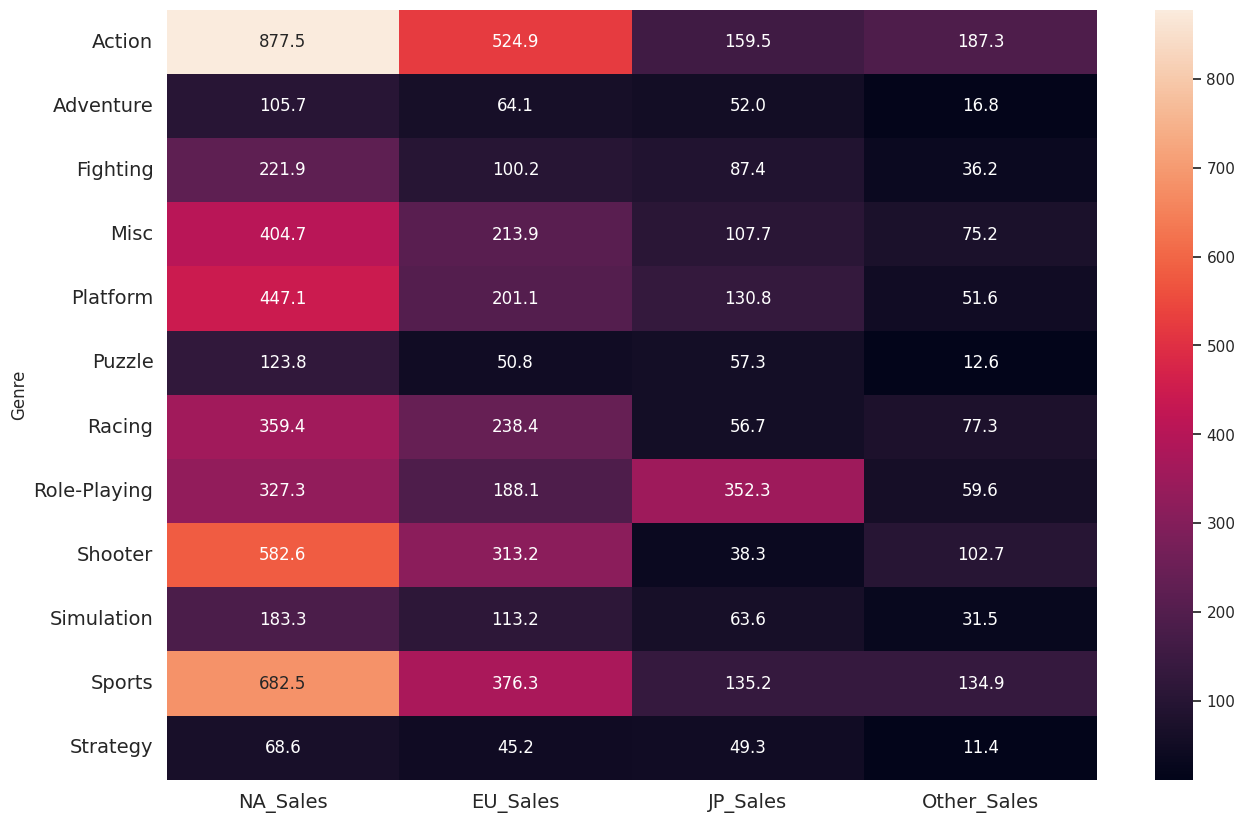

In [30]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [31]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,877.54
1,Adventure,NA_Sales,105.67
2,Fighting,NA_Sales,221.92
3,Misc,NA_Sales,404.67
4,Platform,NA_Sales,447.05


<Axes: xlabel='Genre', ylabel='Sale_Price'>

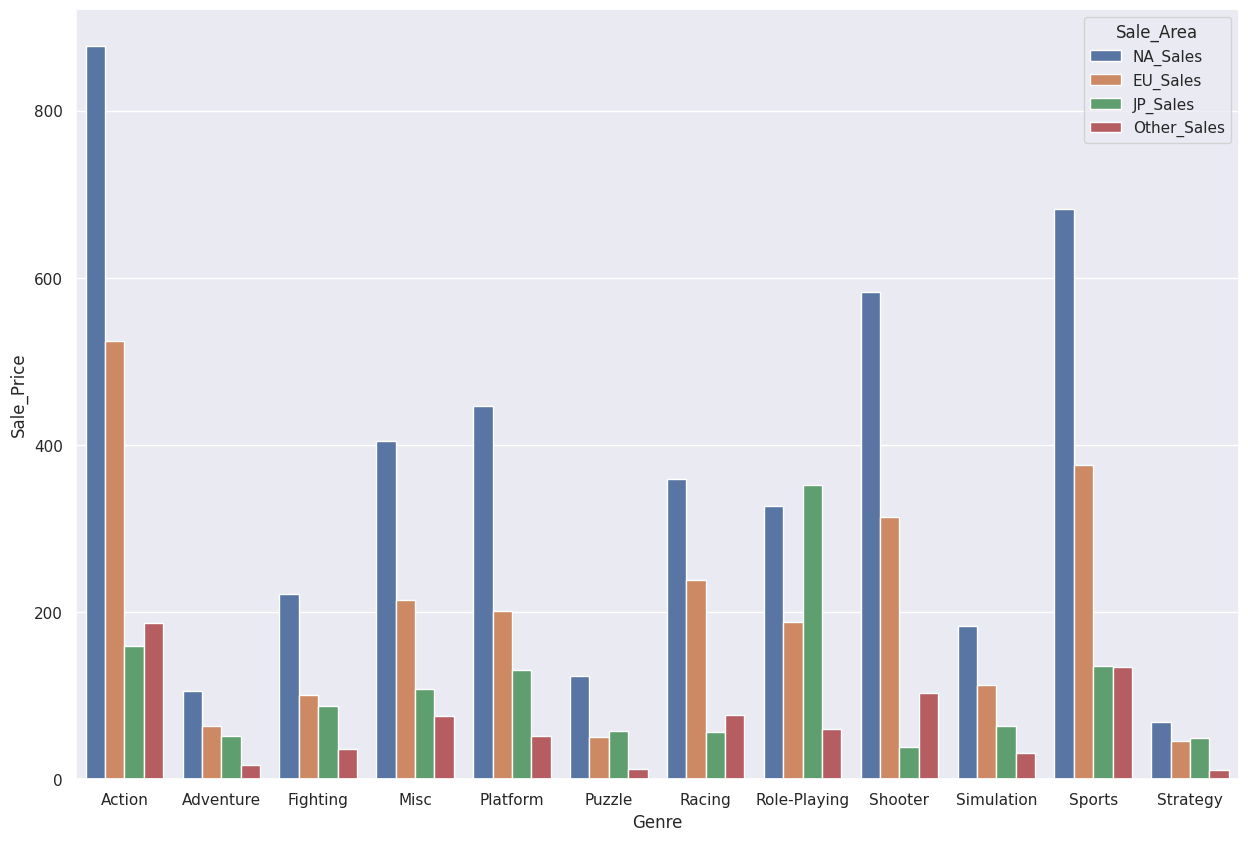

In [32]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

**Top publisher by Count each year**

In [33]:
top_publisher =  data[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)
# top_publisher_count

In [34]:
publisher= top_publisher_count['Publisher']

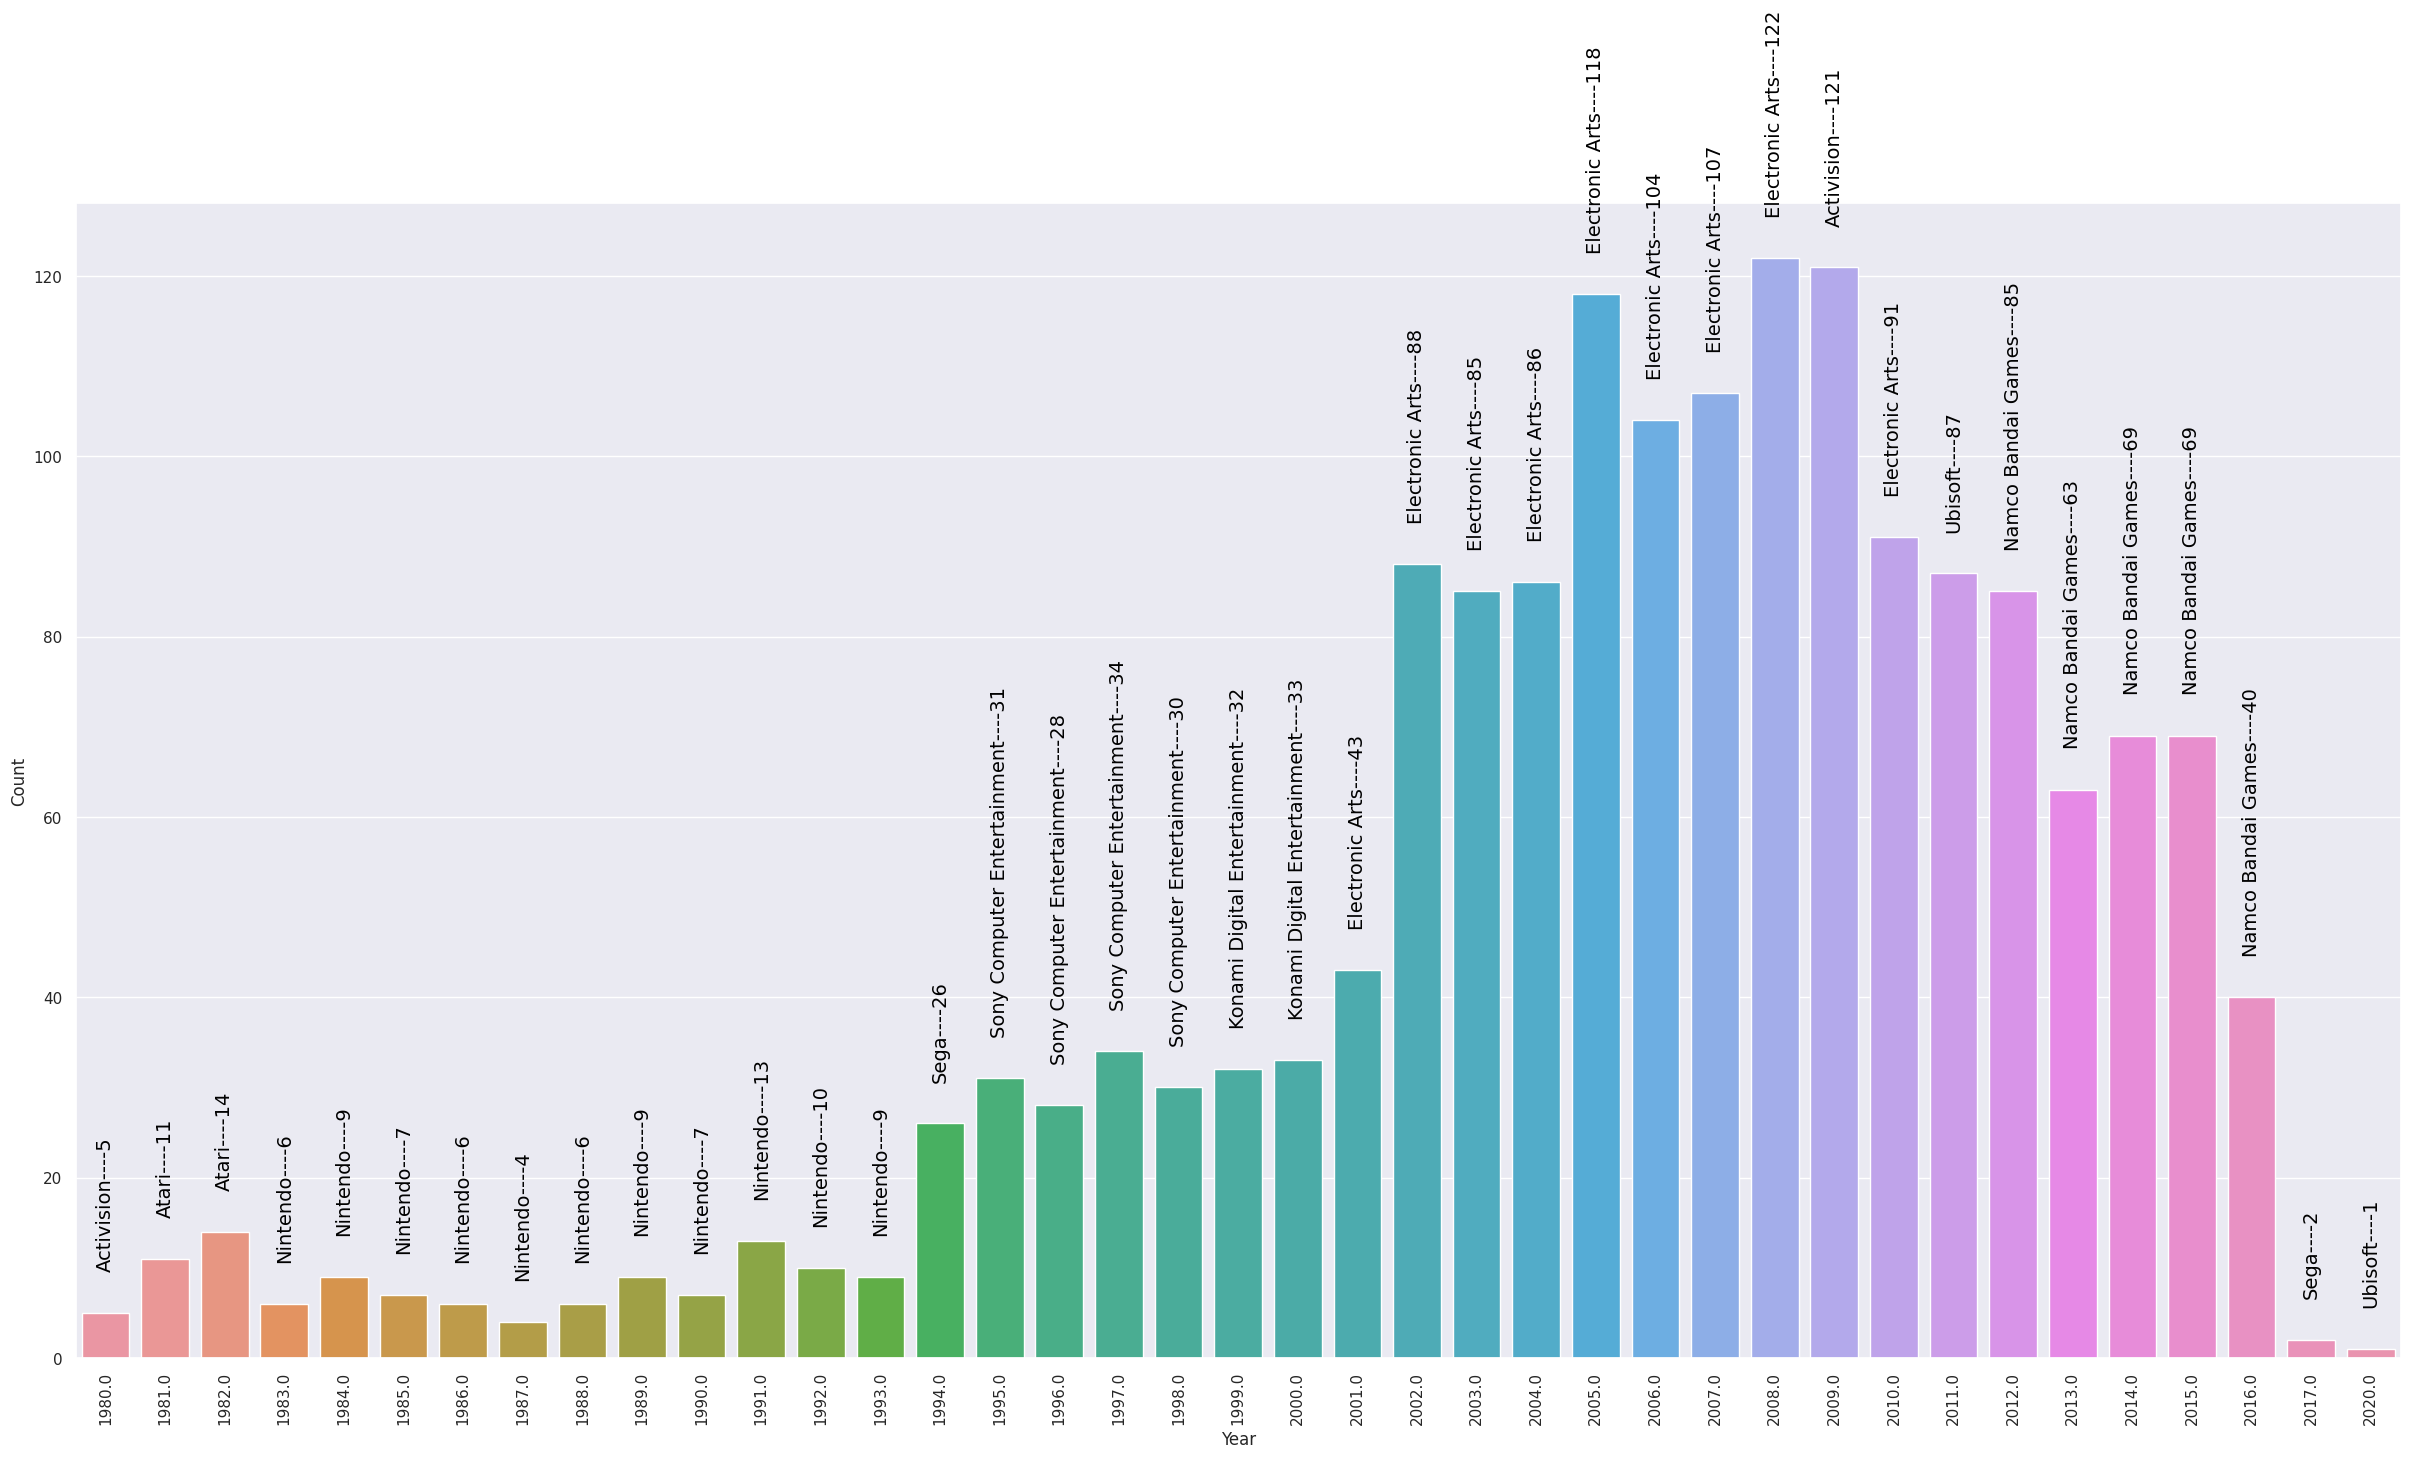

In [35]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
#     print(asd)
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()

**Total revenue by region**

In [37]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4384.41
1,EU_Sales,2429.45
2,JP_Sales,1290.09
3,Other_Sales,797.08


<Axes: xlabel='region', ylabel='sale'>

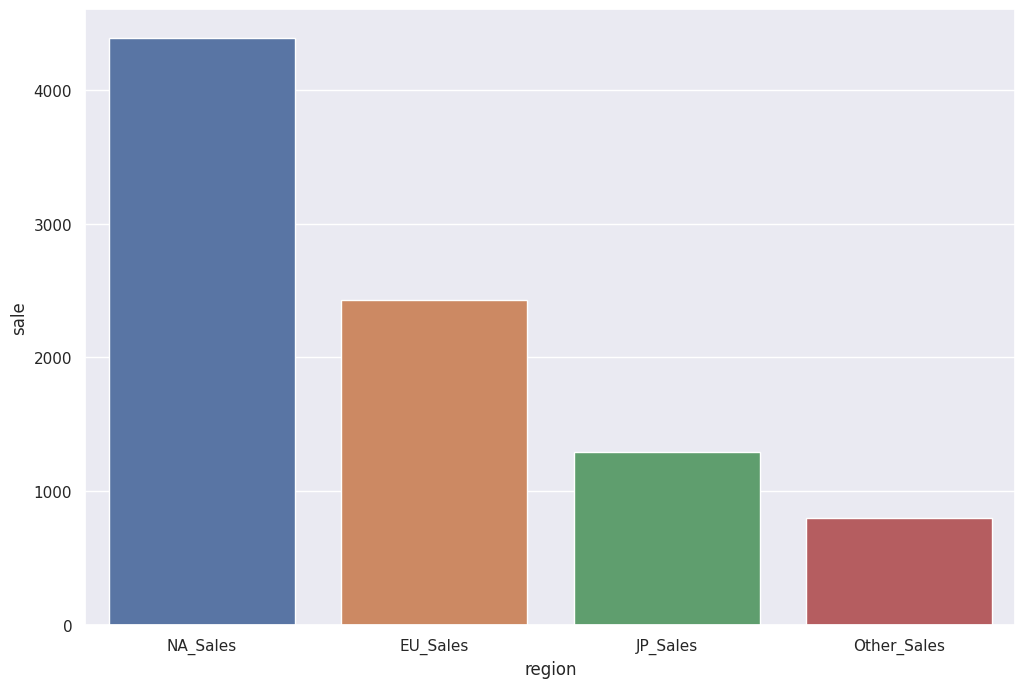

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

In [39]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

([<matplotlib.patches.Wedge at 0x7e7e673c7640>,
 [Text(-1.0997006136087835, 0.025662432239859062, 'NA_Sales'),
  Text(0.7973254757637517, -0.7578074199281156, 'EU_Sales'),
  Text(0.9361585062553668, 0.5775874402769857, 'JP_Sales'),
  Text(0.3053940572619019, 1.0567565801967425, 'Other_Sales')],
 [Text(-0.5998366983320637, 0.013997690312650395, '49.3%'),
  Text(0.4349048049620463, -0.4133495017789721, '27.3%'),
  Text(0.5106319125029273, 0.3150476946965376, '14.5%'),
  Text(0.16657857668831008, 0.5764126801073141, '9.0%')])

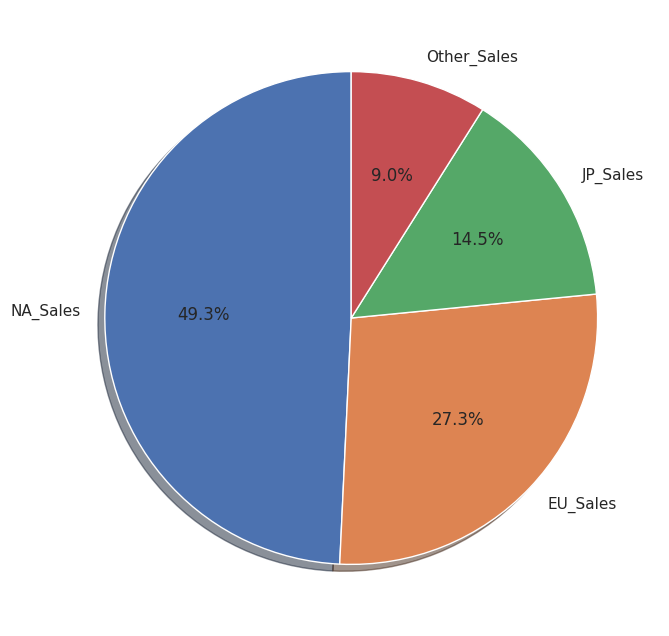

In [40]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

**Sales Histogram**

<ipython-input-41-78853f3af810>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde=False, fit=stats.gamma)


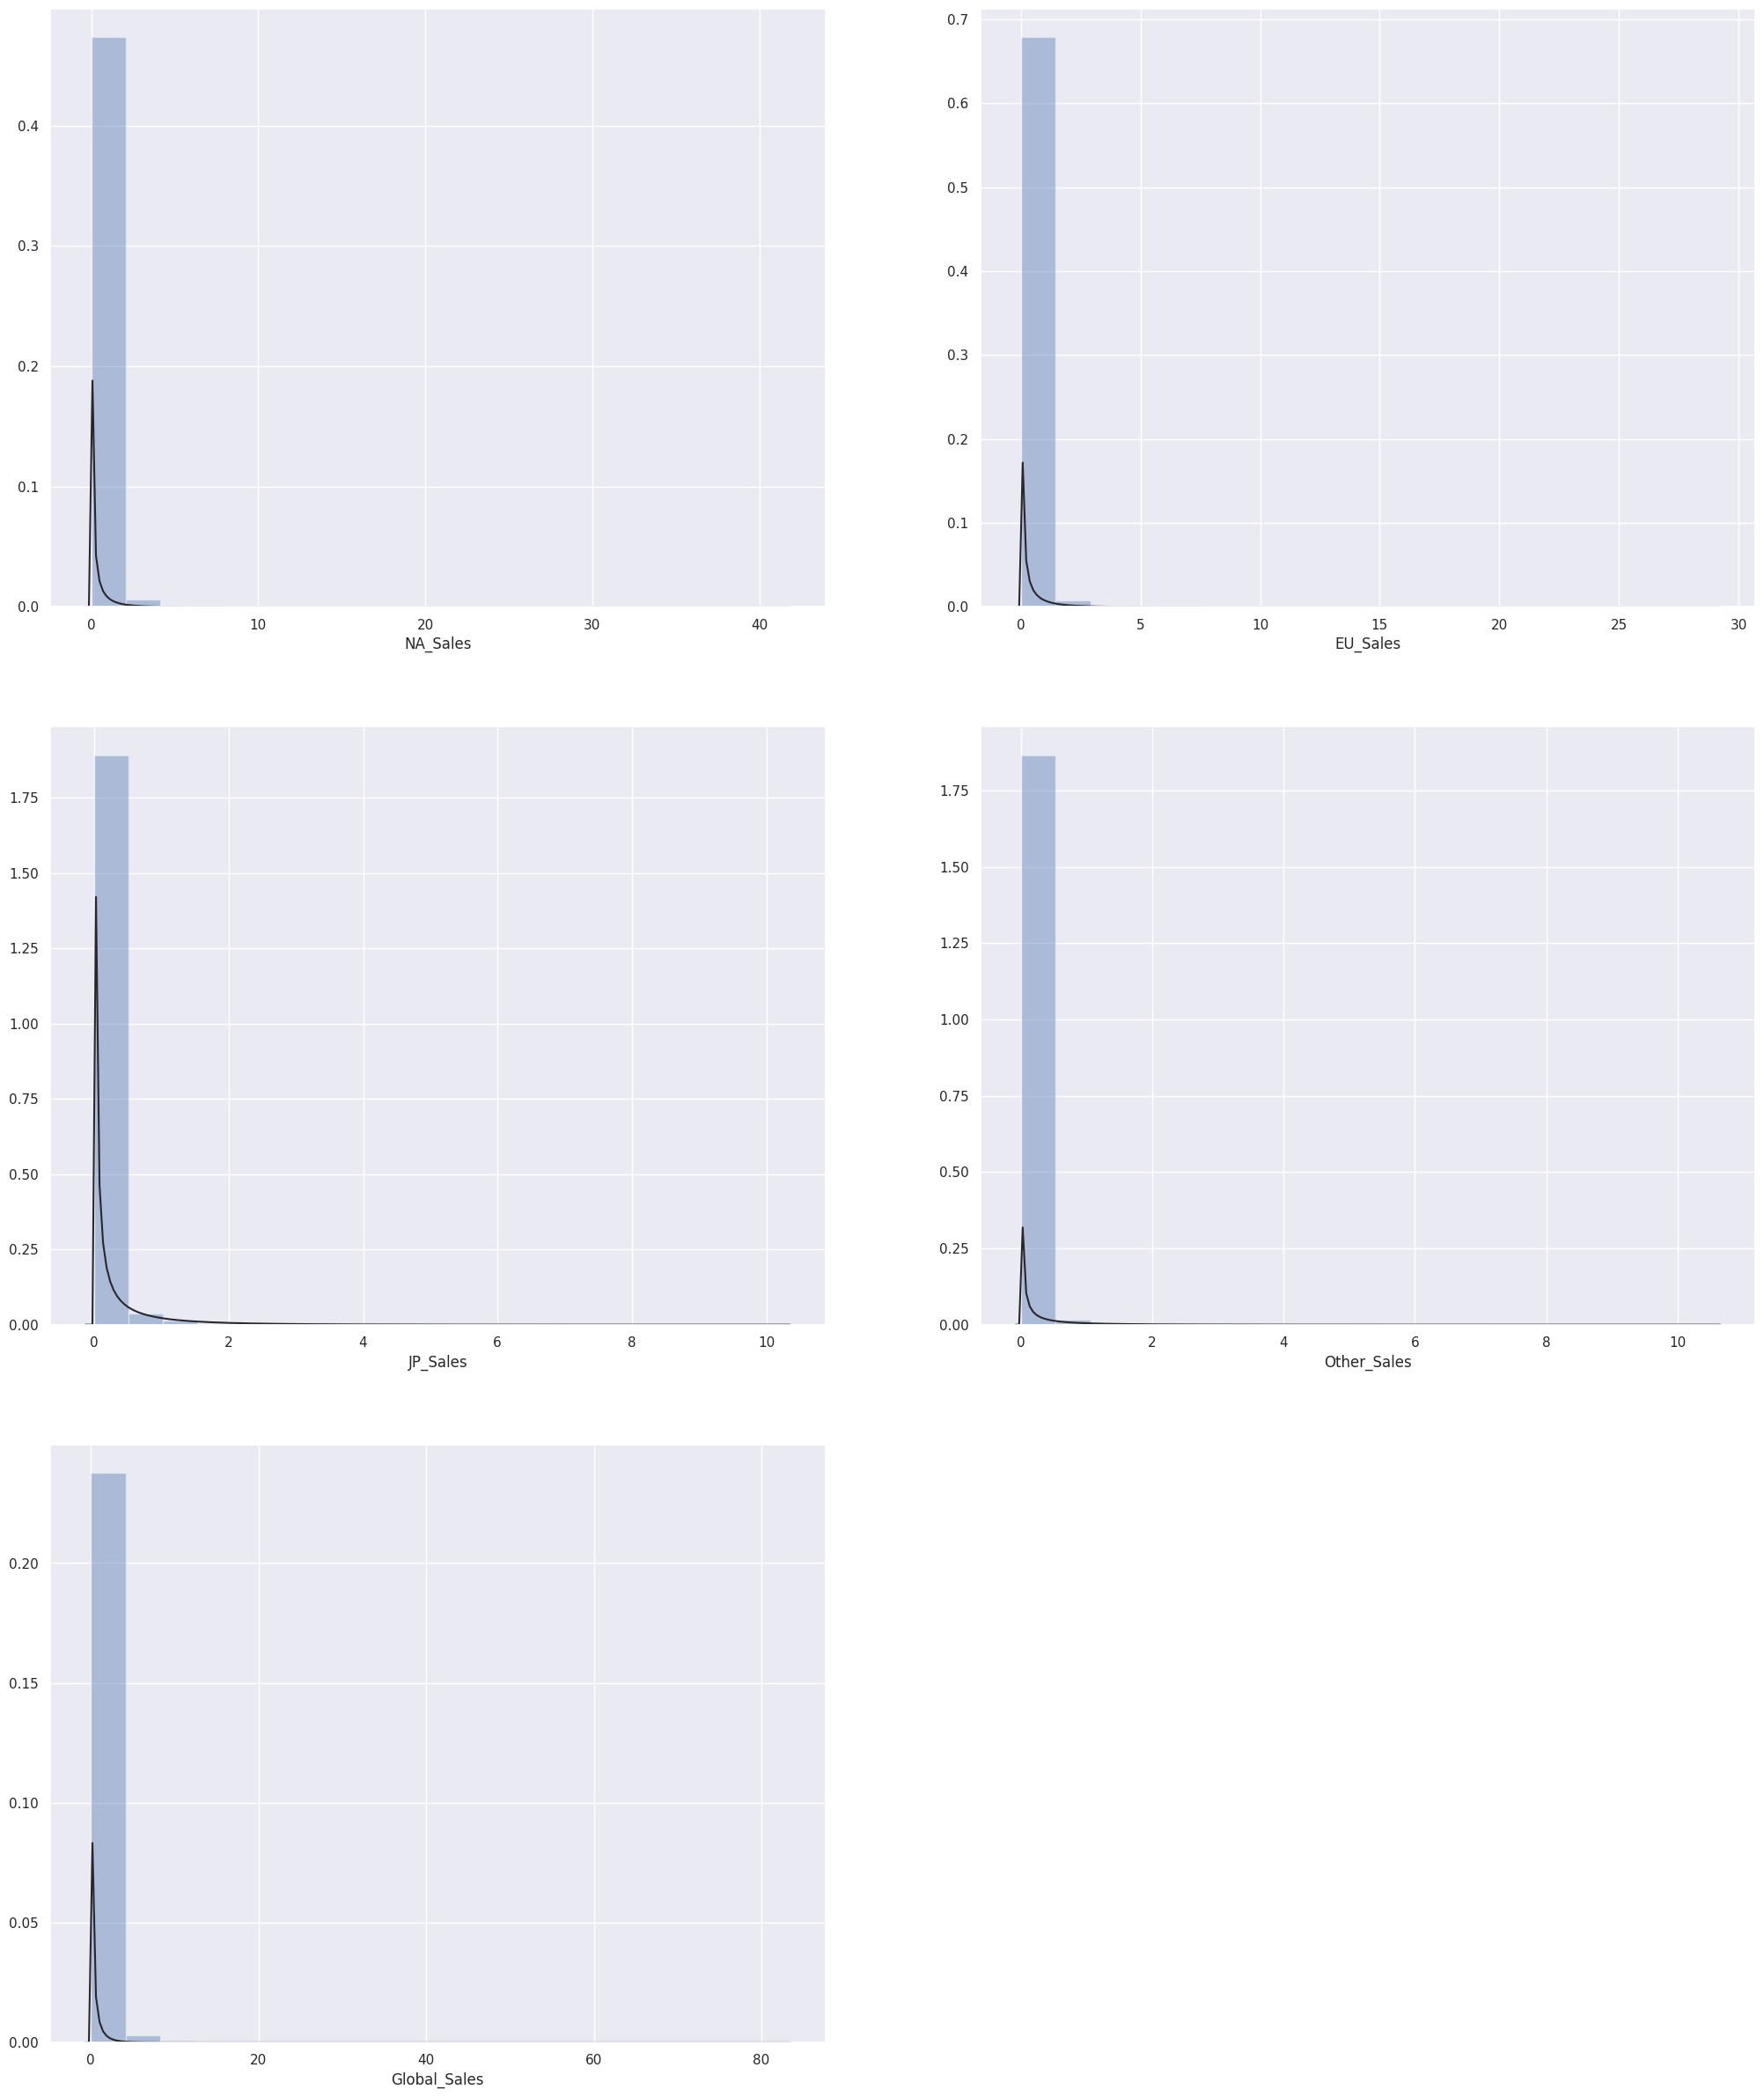

In [41]:
# sns.distplot(data['NA_Sales'],  kde=False, fit=stats.gamma);
# sns.distplot(data['EU_Sales'],  kde=False, fit=stats.gamma);
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(data[column], bins=20, kde=False, fit=stats.gamma)

**Distribution After log transformation**

In [42]:
data_hist_log = data.copy()

In [43]:
data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]

<ipython-input-44-0690421c9a96>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)


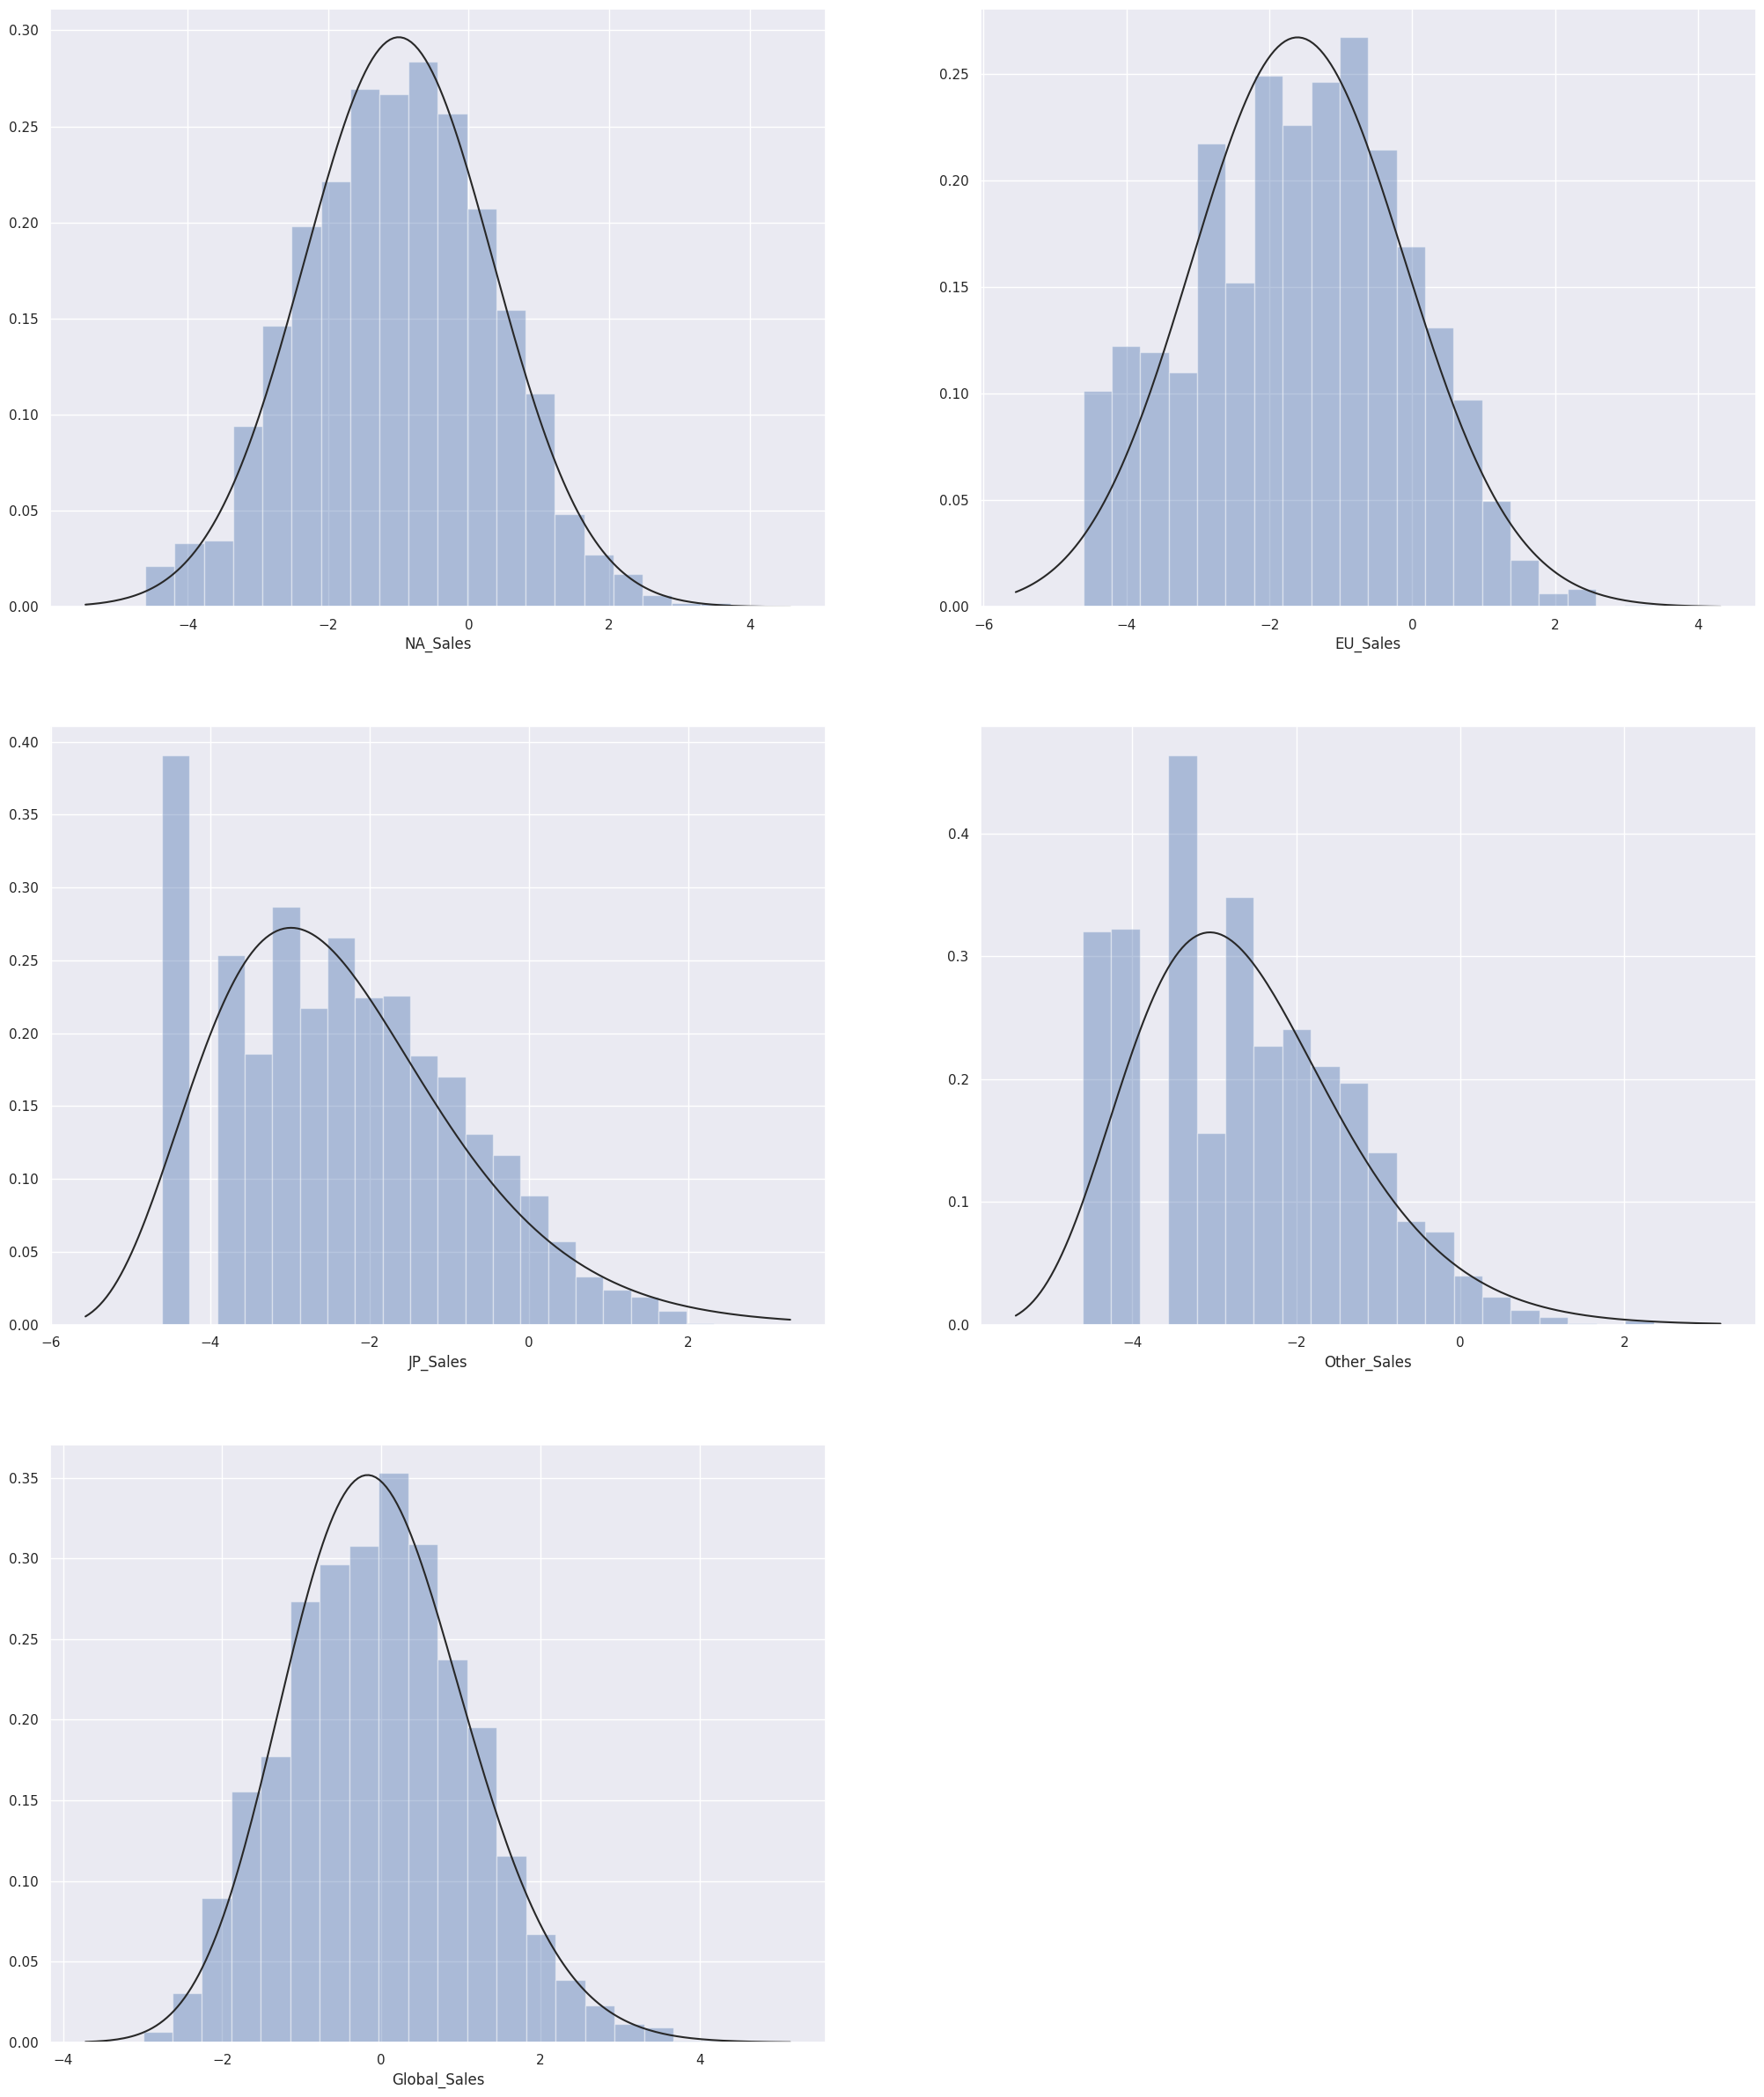

In [44]:
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)

** Relations of columns**

<ipython-input-45-c030c74a712f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap = "Blues", annot=True, linewidth=3)


<Axes: >

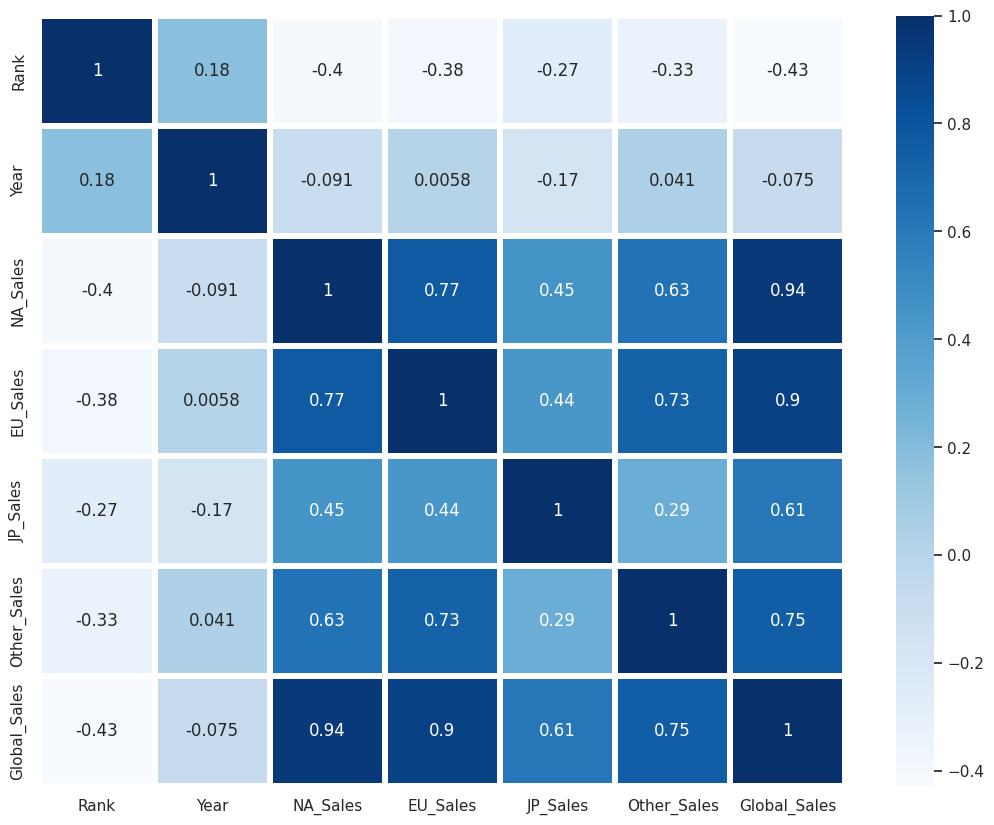

In [45]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap = "Blues", annot=True, linewidth=3)

**Pair plot**

In [46]:
data_pair = data.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.49,29.02,8.46
1,1985.0,NES,Platform,29.08,3.58,0.77
2,2008.0,Wii,Racing,15.85,12.88,3.31
3,2009.0,Wii,Sports,15.75,11.01,2.96
4,1996.0,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002.0,GBA,Platform,0.01,0.00,0.00
16594,2003.0,GC,Shooter,0.01,0.00,0.00
16595,2008.0,PS2,Racing,0.00,0.00,0.00
16596,2010.0,DS,Puzzle,0.00,0.01,0.00


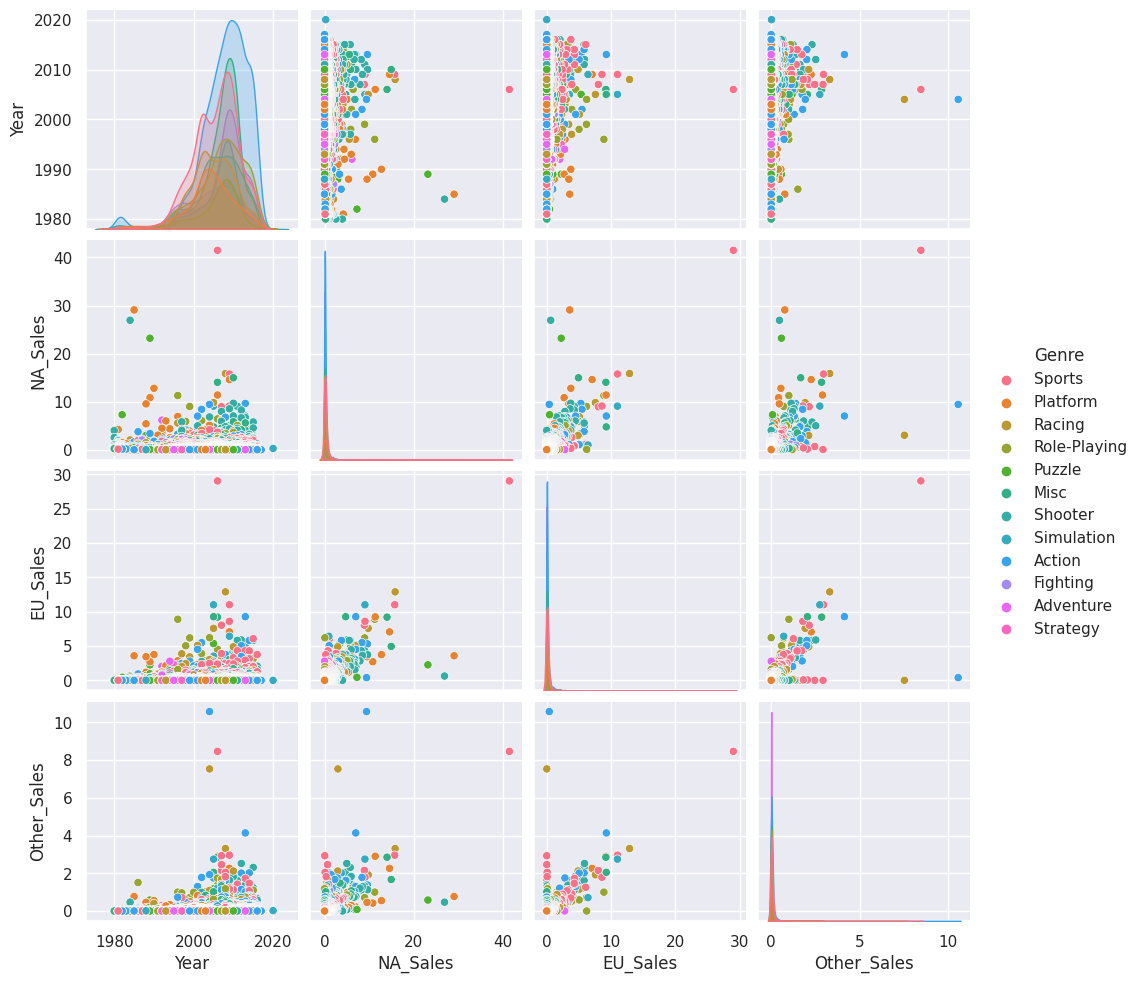

In [47]:
sns.pairplot(data_pair, hue='Genre')

**log work**

In [48]:
data_pair_log = data_pair.copy()

In [49]:
sale_columns = ['NA_Sales', 'EU_Sales', 'Other_Sales']

In [50]:
data_pair_log = data_pair_log[data_pair_log.NA_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.EU_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.Other_Sales != 0]

In [51]:
data_pair_log

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.49,29.02,8.46
1,1985.0,NES,Platform,29.08,3.58,0.77
2,2008.0,Wii,Racing,15.85,12.88,3.31
3,2009.0,Wii,Sports,15.75,11.01,2.96
4,1996.0,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
14092,2016.0,PS4,Adventure,0.01,0.02,0.01
14183,2014.0,PS3,Racing,0.02,0.01,0.01
14185,2011.0,PC,Puzzle,0.01,0.02,0.01
14267,2007.0,PC,Puzzle,0.01,0.02,0.01


In [52]:
data_pair_log['NA_Sales'] = np.log(data_pair_log['NA_Sales']);
data_pair_log['EU_Sales'] = np.log(data_pair_log['EU_Sales']);
data_pair_log['Other_Sales'] = np.log(data_pair_log['Other_Sales']);

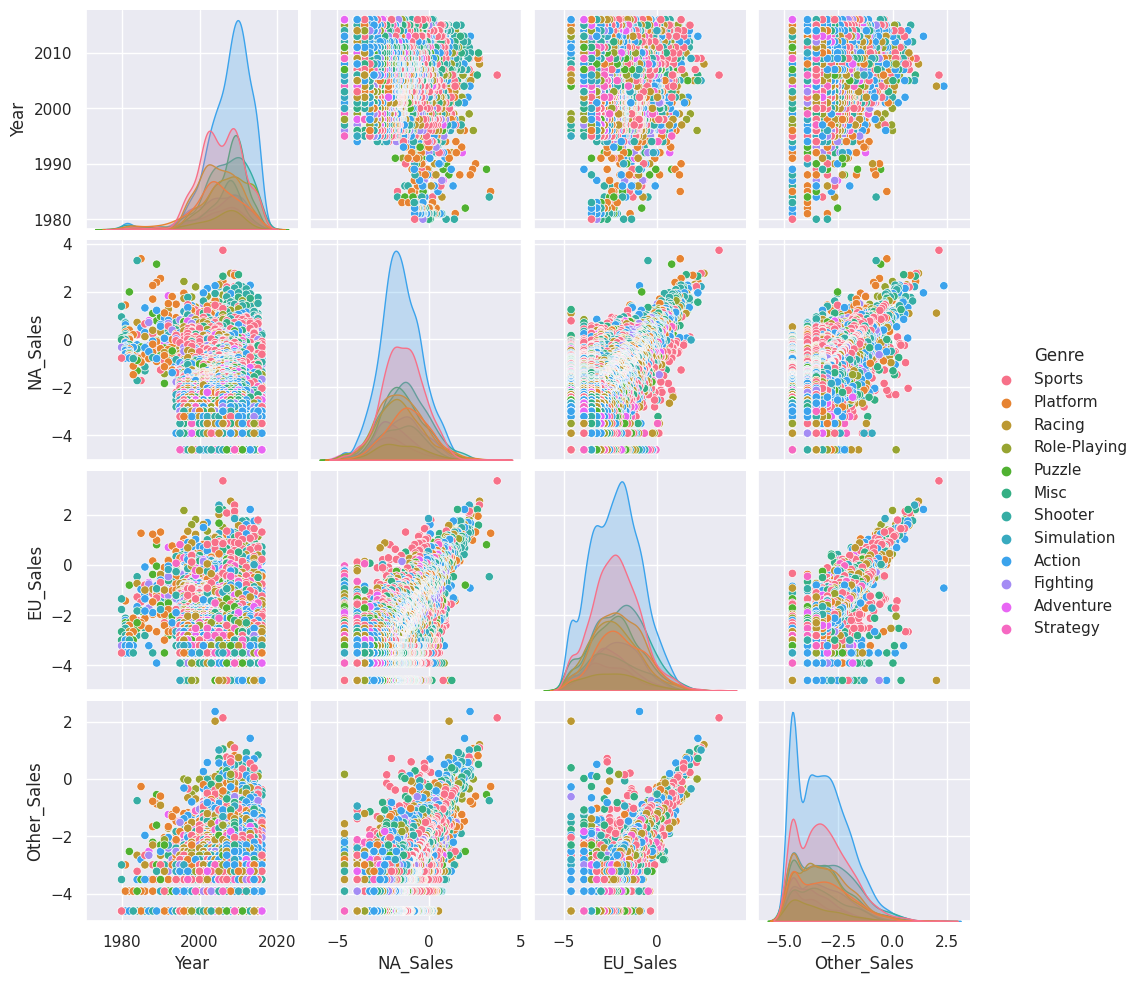

In [53]:
sns.pairplot(data_pair_log, hue='Genre',  palette="husl")